In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cars = pd.read_csv('quikr_car.csv')
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [4]:
cars.shape

(892, 6)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


## Issues
- Year has many non-year ValueError
- Year is in object
- Price has Ask for price option
- Price is in object
- Kms driven has kms with number
- Kms driven is in object
- kms driven has nan Value
- fuel has nan Value
- First 3 words of name

## Cleaning

In [6]:
carcopy = cars.copy()

In [7]:
cars = cars[cars['year'].str.isnumeric()]

In [8]:
cars['year'] = cars['year'].astype(int)

In [9]:
cars = cars[cars['Price'] != 'Ask For Price']

In [10]:
cars['Price'] = cars['Price'].str.replace("," , "").astype(int)

In [11]:
cars = cars[cars['kms_driven'] != 'nan']

In [12]:
cars['kms_driven'] = cars['kms_driven'].str.split(" ").str.get(0).str.replace("," , "")

In [13]:
cars = cars[cars['kms_driven'] != 'Petrol']

In [14]:

cars = cars[~cars['fuel_type'].isna()]

In [15]:
cars['name'] = cars['name'].str.split(" ").str.slice(0,3).str.join(' ')

In [16]:
cars = cars.reset_index(drop=True)

In [17]:
cars.describe()

,year,Price
count,816.000000,8.160000e+02
mean,2012.444853,4.117176e+05
std,4.002992,4.751844e+05
min,1995.000000,3.000000e+04
25%,2010.000000,1.750000e+05
50%,2013.000000,2.999990e+05
75%,2015.000000,4.912500e+05
max,2019.000000,8.500003e+06


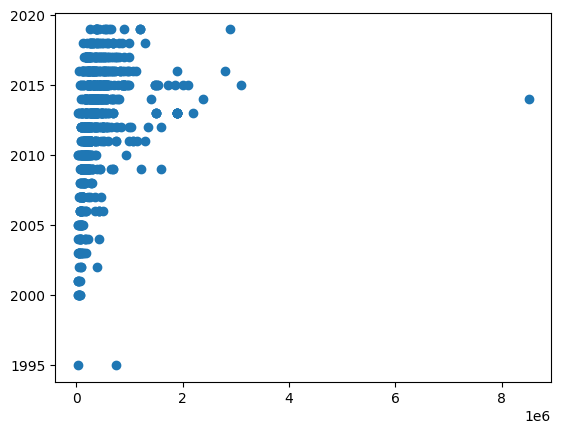

In [18]:
plt.scatter(x=cars['Price'],y=cars['year'])

In [19]:
cars = cars[cars['Price']<6e6].reset_index(drop=True)

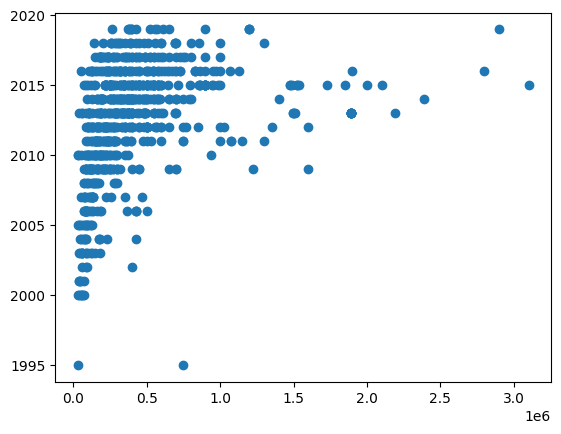

In [20]:
plt.scatter(x=cars['Price'],y=cars['year'])

In [21]:
cars.describe()

,year,Price
count,815.000000,8.150000e+02
mean,2012.442945,4.017933e+05
std,4.005079,3.815888e+05
min,1995.000000,3.000000e+04
25%,2010.000000,1.750000e+05
50%,2013.000000,2.999990e+05
75%,2015.000000,4.900000e+05
max,2019.000000,3.100000e+06


In [22]:
cars.to_csv('Cleaned cars.csv')

In [23]:
y = cars['Price']
x = cars.drop(columns=['Price'])

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline


In [27]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(652, 5)
(163, 5)
(652,)
(163,)


In [28]:
ohe = OneHotEncoder()
ohe.fit(x[['name', 'company' , 'fuel_type']])

OneHotEncoder()

In [29]:
column_trans = make_column_transformer((OneHotEncoder(categories= ohe.categories_) , ['name', 'company' , 'fuel_type']) , remainder='passthrough')

In [30]:
lr = LinearRegression()

In [31]:
pipe = make_pipeline(column_trans , lr)

In [32]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [33]:
y_pred = pipe.predict(x_test)
y_pred

array([ 4.40047419e+05,  1.76980128e+05,  4.27610623e+05,  4.94485144e+05,
        1.75240178e+06,  4.84873396e+05, -2.00675063e+04,  3.61743144e+05,
        5.99314131e+05,  7.15175124e+05,  1.48657858e+06,  7.13580309e+05,
        1.21143793e+06,  5.00875374e+05,  5.99067453e+05,  4.14309270e+05,
        1.77519378e+05,  6.39561002e+05,  4.82834800e+05,  2.54200461e+05,
       -1.07004732e+04,  1.83843377e+05,  2.41135878e+05,  1.77930789e+05,
        7.06456859e+04, -2.62550471e+05,  2.51195699e+05,  1.95020437e+05,
        3.85518297e+04,  1.30337748e+05,  2.37969318e+05,  4.28236744e+05,
        2.21058503e+06,  2.62040438e+05,  4.77923943e+05,  4.46712221e+05,
        3.31196296e+05,  3.02333754e+05,  1.90370343e+05,  1.69944625e+05,
        5.14864782e+05,  1.12688941e+06,  2.21058503e+06,  4.76396649e+05,
        6.08639531e+05,  2.10742100e+05,  7.90851012e+05,  3.58762385e+05,
        1.20965492e+06,  1.43727989e+05,  3.60044882e+05,  2.26539210e+05,
        2.99581569e+05,  

In [34]:
r2_score(y_test , y_pred)

0.6206184325887315

In [35]:
scores = []
for i in range(1000):
    x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=i)
    pipe.fit(x_train,y_train)
    y_pred = pipe.predict(x_test)
    scores.append(r2_score(y_test , y_pred))

In [36]:
import numpy as np

In [37]:
np.argmax(scores)

433

In [38]:
scores[np.argmax(scores)]

0.8457059012561223

In [39]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=np.argmax(scores))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
r2_score(y_test , y_pred)

0.8457059012561223

In [40]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int32 
 3   Price       815 non-null    int32 
 4   kms_driven  815 non-null    object
 5   fuel_type   815 non-null    object
dtypes: int32(2), object(4)
memory usage: 32.0+ KB


In [41]:
import pickle

In [42]:
pickle.dump(pipe,open('LinearRegressionModel.pkl', 'wb'))

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
column_transf = make_column_transformer((OneHotEncoder(categories=ohe.categories_) , ['name' , 'company' , 'fuel_type']) , remainder='passthrough')

In [45]:
# df1 = pd.get_dummies(cars, columns=['name' , 'company' , 'fuel_type'] , drop_first=True).astype(int)

In [46]:
# input_columns = [columns for columns in df1.columns if columns != 'Price']
# output_columns = 'Price'
# x1 = df1.loc[:,input_columns]
# y1 = df1.loc[:,output_columns]

In [47]:
# x_train1 , x_test1 , y_train1 , y_test1 = train_test_split(x1,y1,test_size=0.2)

In [48]:
Dtree = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=3, 
                               random_state=121)

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
max_depth = np.arange(1,21)
min_sample_split = [0.1,0.2,0.3]

param_grid = [{'max_depth': max_depth ,
                'min_samples_split': min_sample_split}]

param_grid

[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19, 20]),
  'min_samples_split': [0.1, 0.2, 0.3]}]

In [51]:
gs = GridSearchCV(estimator= Dtree , param_grid=param_grid , cv=5)

In [52]:
pipe1 = make_pipeline(column_transf , gs)

In [53]:
pipe1.fit(x_train , y_train)

d:\Programs\Python\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('gridsearchcv',
                 GridSearchCV(cv=5,
                              estimator=DecisionTreeClassifier(criterion='entropy',
                                                               max_depth=3,
                                                               random_state=121),
                              param_grid=[{'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                                           'min_samples_split': [0.1, 0.2,
                                                                 0.3]}]))])

In [54]:
predictions = pipe1.predict(x_test)

In [55]:
r2_score(y_test , predictions)

0.9993794196400407

In [56]:
pickle.dump(pipe1 , open("DecisionTree.pkl", "wb"))

In [64]:
pipe1.predict(pd.DataFrame([['Maruti Suzuki Swift' , 'Maruti' , 2015 ,100, 'Diesel']], columns=['name','company','year','kms_driven','fuel_type']))

array([219000])

In [67]:
pipe.predict(pd.DataFrame([['Maruti Suzuki Swift' , 'Maruti' , 2020 ,1000, 'Diesel']], columns=['name','company','year','kms_driven','fuel_type']))

array([551335.52384402])